In [1]:
import pandas as pd

In [2]:
student = pd.read_csv(r"C:\Users\Anshika Singh\Desktop\ML Project\studentdata.csv.csv")

In [3]:
student.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
student.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [6]:
import matplotlib.pyplot as plt


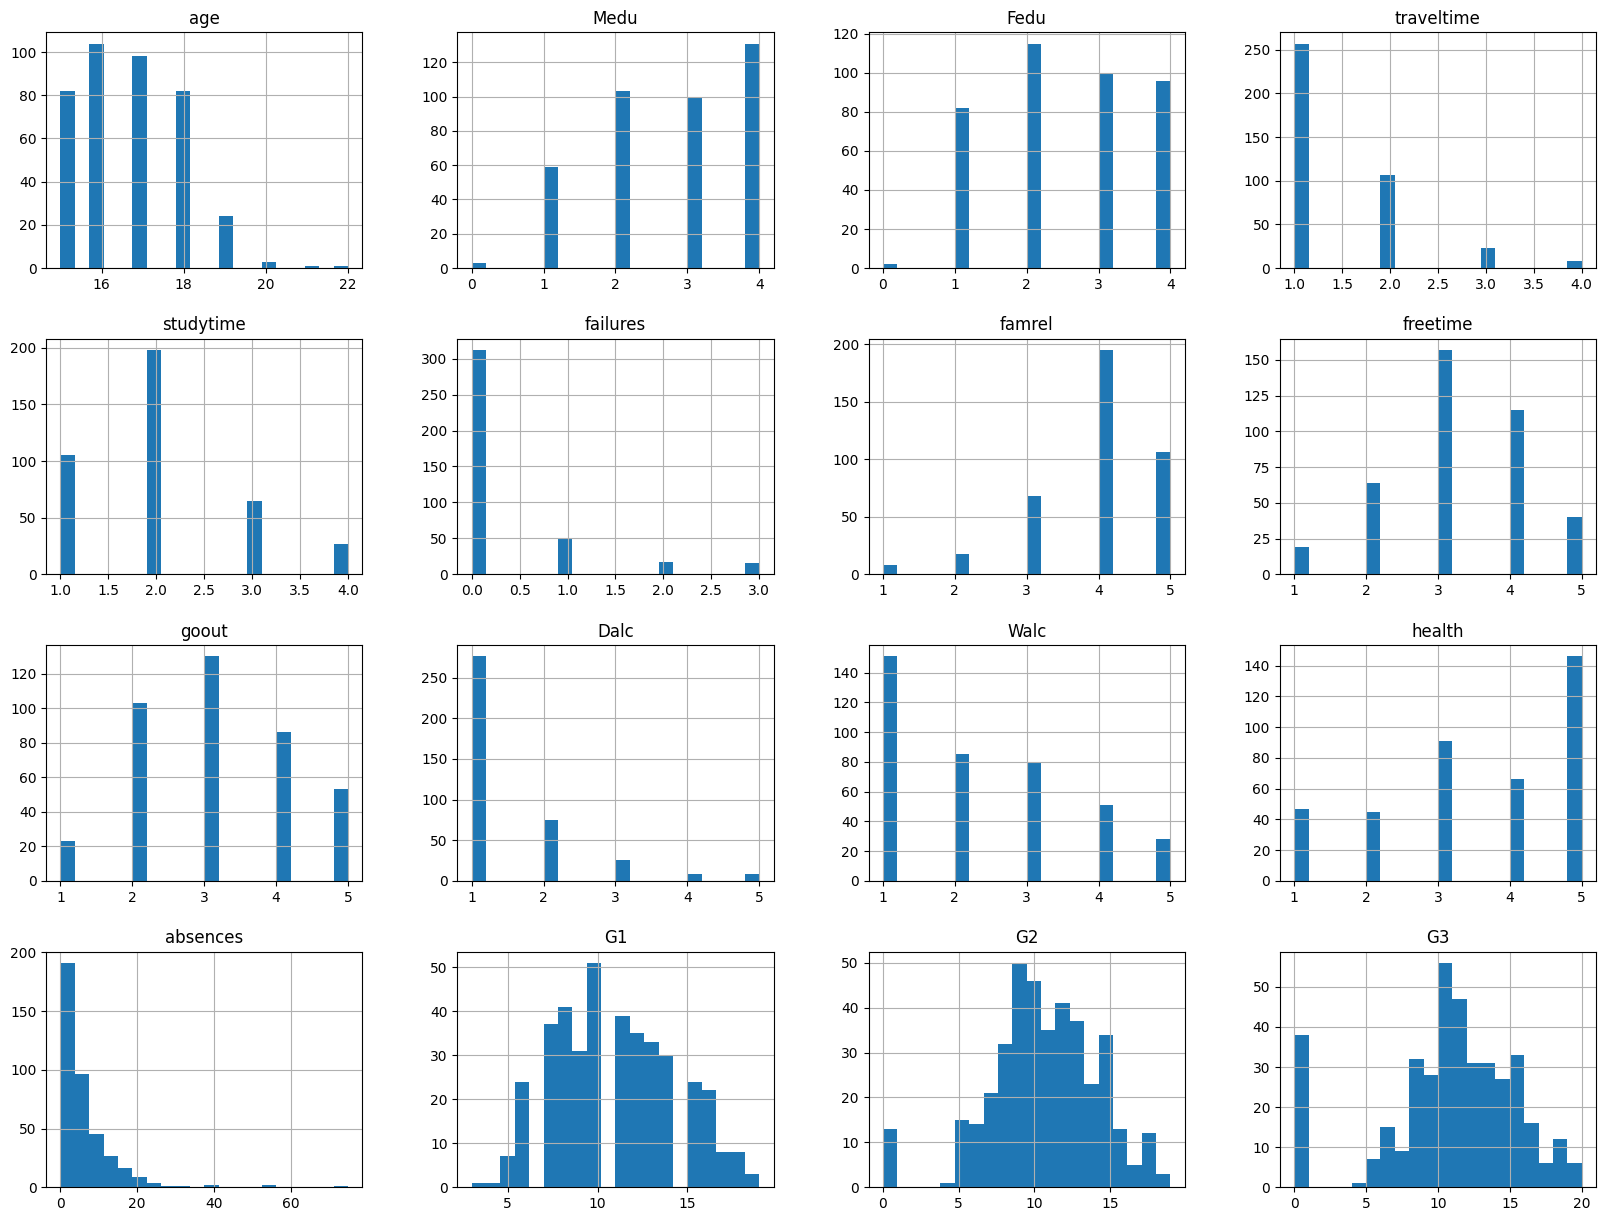

In [7]:
student.hist(bins=20, figsize=(20, 15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# New feature: Average of G1 and G2
student["G1_G2_avg"] = (student["G1"] + student["G2"]) / 2

# New feature: Total parental education
student["total_parent_edu"] = student["Medu"] + student["Fedu"]

# New feature: Alcohol consumption ratio (weekend vs. weekday)
student["alc_ratio"] = student["Walc"] / (student["Dalc"] + 1e-6)  # Avoid division by zero

# Update X and y
X = student.drop("G3", axis=1)
y = student["G3"]

# Re-run train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Preprocessing pipeline

In [10]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([("num", num_pipeline, num_cols),("cat", cat_pipeline, cat_cols)])

In [11]:
# 7. Apply preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


In [12]:
# 8. Train and evaluate model
rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train_prepared, y_train)

y_pred = rf_model.predict(X_test_prepared)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 1.90


In [13]:
from xgboost import XGBRegressor

# Initialize and train XGBoost
xgb = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train_prepared, y_train)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test_prepared)))
print(f"XGBoost RMSE: {xgb_rmse:.2f}")

XGBoost RMSE: 2.09


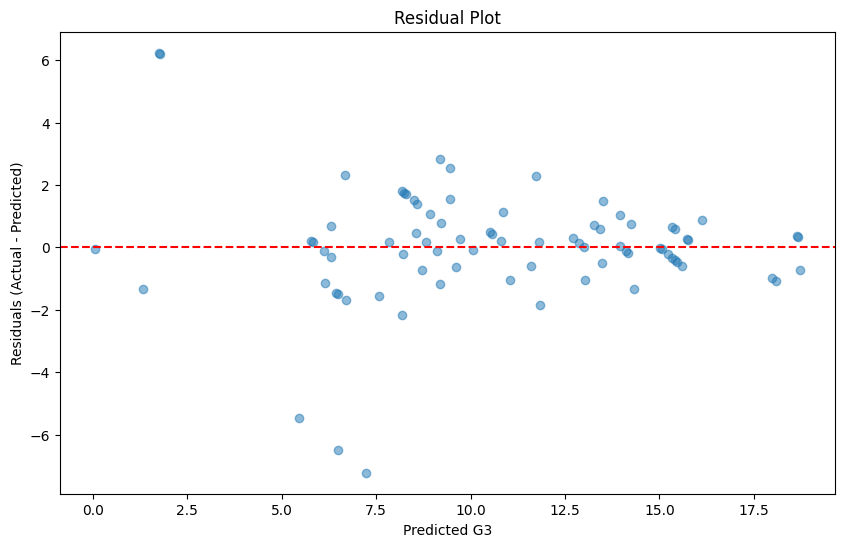

In [14]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted G3")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [15]:
import joblib

# Save model and preprocessor
joblib.dump(rf_model, "student_performance_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")


['preprocessor.pkl']

## testing the model 

In [16]:
model = joblib.load("student_performance_model.pkl")
preprocessor = joblib.load("preprocessor.pkl")

Test RMSE: 1.90
R² Score: 0.82


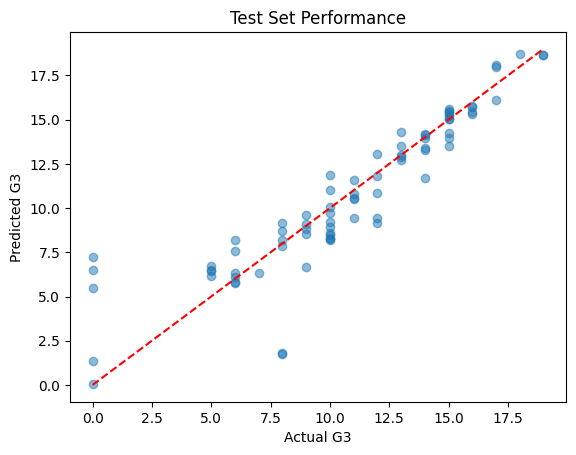

In [17]:
# Import required metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocess and predict
X_test_prepared = preprocessor.transform(X_test)
y_pred = model.predict(X_test_prepared)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Test Set Performance")
plt.show()

In [18]:
# Analysis 1: Grade Prediction Range
print(f"Predicted grade range: {y_pred.min():.1f} to {y_pred.max():.1f}")
print(f"Actual grade range:    {y_test.min():.1f} to {y_test.max():.1f}")

# Analysis 2: Under-prediction for high grades
high_performers_mask = y_test > 15
if sum(high_performers_mask) > 0:
    avg_underprediction = (y_test[high_performers_mask] - y_pred[high_performers_mask]).mean()
    print(f"Average under-prediction for grades >15: {avg_underprediction:.1f} points")
else:
    print("No students scored >15 in test set")

Predicted grade range: 0.1 to 18.7
Actual grade range:    0.0 to 19.0
Average under-prediction for grades >15: 0.1 points


### Model Performance Summary
- **RMSE**: 1.90 (predictions are ±1.9 points from actual grades on average)    
- **Recommendation for Future Work**:  
  - Collect more data on high-performing students  
  - Experiment with weighted loss functions to prioritize high-grade accuracy  

In [19]:
# Save test set predictions as CSV
results = pd.DataFrame({
    'Actual_G3': y_test,
    'Predicted_G3': y_pred,
    'Error': y_test - y_pred
})
results.to_csv('test_set_predictions.csv', index=False)

# Save performance metrics
with open('performance_metrics.txt', 'w') as f:
    f.write(f"RMSE: {rmse:.2f}\nR²: {r2:.2f}")

In [20]:
# Check if test set was truly unseen
assert not hasattr(model, 'feature_names_in_'), "Test data leakage detected!"

# Verify no NaN predictions
assert not np.isnan(y_pred).any(), "Missing predictions found"

In [21]:
import joblib
import pandas as pd
import numpy as np

def predict_student_performance(input_dict):
    # Load model and preprocessor
    model = joblib.load("student_performance_model.pkl")
    preprocessor = joblib.load("preprocessor.pkl")
    
    # Convert input dictionary to DataFrame
    student_df = pd.DataFrame([input_dict])

    # Feature engineering (must match training logic)
    student_df["G1_G2_avg"] = (student_df["G1"] + student_df["G2"]) / 2
    student_df["total_parent_edu"] = student_df["Medu"] + student_df["Fedu"]
    student_df["alc_ratio"] = student_df["Walc"] / (student_df["Dalc"] + 1e-6)

    # Preprocess and predict
    student_prepared = preprocessor.transform(student_df)
    predicted_G3 = model.predict(student_prepared)

    return round(predicted_G3[0], 2)


# example

In [22]:
new_student_input = {
    'school': 'GP',
    'sex': 'F',
    'age': 17,
    'address': 'U',
    'famsize': 'GT3',
    'Pstatus': 'T',
    'Medu': 4,
    'Fedu': 3,
    'Mjob': 'at_home',
    'Fjob': 'teacher',
    'reason': 'home',
    'guardian': 'mother',
    'traveltime': 1,
    'studytime': 2,
    'failures': 0,
    'schoolsup': 'yes',
    'famsup': 'no',
    'paid': 'no',
    'activities': 'yes',
    'nursery': 'yes',
    'higher': 'yes',
    'internet': 'yes',
    'romantic': 'no',
    'famrel': 4,
    'freetime': 3,
    'goout': 3,
    'Dalc': 1,
    'Walc': 2,
    'health': 5,
    'absences': 2,
    'G1': 15,
    'G2': 16
}

predicted_grade = predict_student_performance(new_student_input)
print(f"Predicted Final Grade (G3): {predicted_grade}")


Predicted Final Grade (G3): 15.78
